# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

In [1]:
from os import sep
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

## Импорт данных

In [2]:
buildings_common = pd.read_csv('./data/building_under_construction.csv', sep=',')
buildings_common.head()

objId  rpdRegionCd                                            objAddr  \
0  22530           54  Новосибирск, район Ленинский, ул Большая, д. 6...   
1  22531           54  Новосибирск, район Ленинский, ул Большая, д. 6...   
2  22532           54  Новосибирск, район Ленинский, ул Большая, д. 6...   
3  22533           54  Новосибирск, район Ленинский, ул Большая, д. 6...   
4  22534           54  Новосибирск, район Ленинский, ул Большая, д. 6...   

   objFloorMin  objFloorMax  objElemLivingCnt objReady100PercDt  \
0            5            5                69        2020-12-31   
1            5            5                69        2020-12-31   
2            5            5                69        2020-12-31   
3            5            5                69        2020-12-31   
4            5            5                69        2020-12-31   

   objSquareLiving  objCompensFundFlg  objProblemFlg  ...  \
0          2260.59                  0              0  ...   
1          2260.59                  0              0  ...   
2          2260.59                  0              0  ...   
3          2260.59                  0              0  ...   
4          2260.59                  0              0  ...   

                 developer.orgForm.fullForm  developer.orgForm.shortForm  \
0  Общество с ограниченной ответственностью                          ООО   
1  Общество с ограниченной ответственностью                          ООО   
2  Общество с ограниченной ответственностью                          ООО   
3  Общество с ограниченной ответственностью                          ООО   
4  Общество с ограниченной ответственностью                          ООО   

  developer.companyGroup developer.devInn  \
0                    NaN       5407478706   
1                    NaN       5407478706   
2                    NaN       5407478706   
3                    NaN       5407478706   
4                    NaN       5407478706   

                                        objCommercNm  complexShortName  \
0  Жилой дом №4/10 (по генплану) - IV этап строит...      НОВОМАРУСИНО   
1  Жилой дом №4/9 (по генплану) - IV этап строите...      НОВОМАРУСИНО   
2  Жилой дом №4/8 (по генплану) - III этап строит...      НОВОМАРУСИНО   
3  Жилой дом №4/7 (по генплану) - III этап строит...      НОВОМАРУСИНО   
4  Жилой дом №4/6 (по генплану) - III этап строит...      НОВОМАРУСИНО   

  developer.bankruptStage.bankruptStageCd  \
0                                     4.0   
1                                     4.0   
2                                     4.0   
3                                     4.0   
4                                     4.0   

           developer.bankruptStage.bankruptStageDesc  \
0  Сообщение о судебном акте. О признании должник...   
1  Сообщение о судебном акте. О признании должник...   
2  Сообщение о судебном акте. О признании должник...   
3  Сообщение о судебном акте. О признании должник...   
4  Сообщение о судебном акте. О признании должник...   

              developer.bankruptStage.bankruptLawUrl  \
0  http://www.consultant.ru/document/cons_doc_LAW...   
1  http://www.consultant.ru/document/cons_doc_LAW...   
2  http://www.consultant.ru/document/cons_doc_LAW...   
3  http://www.consultant.ru/document/cons_doc_LAW...   
4  http://www.consultant.ru/document/cons_doc_LAW...   

   developer.orgBankruptMsgDttm  
0              21-06-2019 17:49  
1              21-06-2019 17:49  
2              21-06-2019 17:49  
3              21-06-2019 17:49  
4              21-06-2019 17:49  

[5 rows x 35 columns]

In [3]:
buildings_particular = pd.read_csv('./data/all_about_buildings.csv', sep=',', index_col='id')
buildings_particular = buildings_particular.drop('Unnamed: 0', axis=1)
buildings_particular.head(10)

pdId  region                                            address  \
id                                                                        
22530  42300      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22531  42223      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22532  42219      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22533  42215      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22534  42128      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22536  42124      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22540  38076      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
24590  62061      52  г Нижний Новгород, район Канавинский, улица Ар...   
22543  37689      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22544  37310      54  Новосибирск, район Ленинский, ул Большая, д. 6...   

                                                 nameObj  floorMin  floorMax  \
id                                                                             
22530  Жилой дом №4/10 (по генплану) - IV этап строит...         5         5   
22531  Жилой дом №4/9 (по генплану) - IV этап строите...         5         5   
22532  Жилой дом №4/8 (по генплану) - III этап строит...         5         5   
22533  Жилой дом №4/7 (по генплану) - III этап строит...         5         5   
22534  Жилой дом №4/6 (по генплану) - III этап строит...         5         5   
22536  Жилой дом №4/5 (по генплану) - III этап строит...         5         5   
22540  Жилой дом №7 (по генплану) - VII этап строител...        11        11   
24590                                        ДОМ У ОЗЕРА        15        15   
22543  Жилой дом №3 (по генплану) - II этап строитель...        11        11   
22544  Жилой дом №2 (по генплану) - V этап строительс...        11        11   

       objElemLivingCnt objReady100PercDt wallMaterialShortDesc  \
id                                                                
22530                69        2020-12-31                Другое   
22531                69        2020-12-31                Другое   
22532                69        2020-12-31                Другое   
22533                69        2020-12-31                Другое   
22534                69        2020-12-31                Другое   
22536                69        2020-12-31                Другое   
22540               470        2021-06-30                Другое   
24590                74        2022-12-31                Кирпич   
22543               471        2020-12-31                Другое   
22544               160        2021-03-31                Другое   

      objLkFinishTypeDesc  ... generalContractorNm  greenAreaIndexValue  \
id                         ...                                            
22530         Без отделки  ...                 NaN                  NaN   
22531        Под чистовую  ...                 NaN                  NaN   
22532         Без отделки  ...                 NaN                  NaN   
22533         Без отделки  ...                 NaN                  NaN   
22534         Без отделки  ...                 NaN                  NaN   
22536         Без отделки  ...                 NaN                  NaN   
22540         Без отделки  ...                 NaN                  NaN   
24590            Под ключ  ...                 NaN                  NaN   
22543         Без отделки  ...                 NaN                  NaN   
22544         Без отделки  ...                 NaN                  NaN   

       airQualityIndexValue metro.id metro.name metro.line  metro.color  \
id                                                                        
22530                   NaN      NaN        NaN        NaN          NaN   
22531                   NaN      NaN        NaN        NaN          NaN   
22532                   NaN      NaN        NaN        NaN          NaN   
22533                   NaN      NaN        NaN        NaN       

In [4]:
pd.Series(buildings_particular.columns)

0              pdId
1            region
2           address
3           nameObj
4          floorMin
           ...     
102      metro.line
103     metro.color
104      metro.time
105    metro.isWalk
106    metro.colors
Length: 107, dtype: object

## Получение названий регионов по номеру региона

In [5]:
regions = pd.read_csv('./data/regions.csv', sep=',')
regions['kladr_id'] = regions['kladr_id'].apply(lambda x: x // 100000000000)
regions = regions[['name_with_type', 'kladr_id']]
regions

name_with_type  kladr_id
0         Респ Адыгея         1
1   Респ Башкортостан         2
2        Респ Бурятия         3
3          Респ Алтай         4
4       Респ Дагестан         5
..                ...       ...
81       Чукотский АО        87
82  Ямало-Ненецкий АО        89
83          Респ Крым        91
84      г Севастополь        92
85         г Байконур        99

[86 rows x 2 columns]

In [6]:
reg_name = pd.DataFrame(buildings_particular['region'].unique(), columns=[ 'region'])
reg_num_name = reg_name.set_index('region').join(regions.set_index('kladr_id'))
reg_num_name

name_with_type
region                           
54              Новосибирская обл
52              Нижегородская обл
35                Вологодская обл
5                   Респ Дагестан
61                 Ростовская обл
...                           ...
75             Забайкальский край
4                      Респ Алтай
9       Респ Карачаево-Черкесская
6                  Респ Ингушетия
49                Магаданская обл

[81 rows x 1 columns]

## Исследуем корреляцию между столбцами и выделим наиболее коррелирующие abs(0.6)

In [6]:
corr = buildings_particular.drop(['pdId', 'objProblemFlg', 'objStatus', 'isAvailableWantLiveHere'], axis=1).corr()
corr

region  floorMin  floorMax  \
region                                   1.000000 -0.007242  0.076745   
floorMin                                -0.007242  1.000000  0.774096   
floorMax                                 0.076745  0.774096  1.000000   
objElemLivingCnt                         0.102603  0.355642  0.603620   
objElemParkingCnt                        0.102373 -0.023907  0.149798   
objSquareLiving                          0.108662  0.347546  0.628625   
objLkLatitude                            0.387151 -0.012910  0.045315   
objLkLongitude                          -0.230480  0.000899 -0.031177   
objCompensFundFlg                       -0.033082 -0.003245  0.002977   
objGuarantyEscrowFlg                     0.004426  0.070464  0.077159   
residentialBuildings                    -0.074497  0.241368  0.270918   
newBuildingId                           -0.007823 -0.018701 -0.015494   
objFloorCnt                              0.076745  0.774096  1.000000   
objFlatCnt                               0.102603  0.355642  0.603620   
objFlatSq                                0.108662  0.347546  0.628625   
objNonlivElemCnt                         0.126858  0.113822  0.250825   
objInfrstrBicycleLaneFlg                 0.056837  0.031410  0.099916   
objInfrstrRampFlg                       -0.125353  0.111126  0.078937   
objInfrstrCurbLoweringFlg                0.018503  0.155515  0.160109   
nonlivFirstFloor                         0.075800  0.197239  0.284676   
conclusion                               0.020289  0.144090  0.186160   
objGreenHouseFlg                         0.053283  0.102680  0.159424   
transportDistIndexValue                  0.080780  0.113598  0.261492   
infrastructureIndexValue                -0.039033  0.301188  0.421822   
developer.devId                         -0.002390 -0.044287 -0.005286   
developer.problObjCnt                    0.032662 -0.030373 -0.042970   
developer.buildObjCnt                    0.154922 -0.153400 -0.204802   
developer.comissObjCnt                   0.199827 -0.011166 -0.053178   
developer.devInn                         0.884344 -0.013454  0.067493   
developer.devOgrn                        0.093884  0.035723  0.060804   
developer.devKpp                         0.914694 -0.024483  0.055814   
developer.lastRpdId                      0.028989  0.043453  0.059957   
developer.fundGuarantyFlg               -0.011678  0.037646  0.029985   
developer.devOrgRegRegionCd              0.914298 -0.028679  0.049517   
developer.orgForm.id                    -0.029720 -0.014075 -0.022862   
developer.bankruptStage.bankruptStageCd -0.015080 -0.150398 -0.163071   
developer.objGuarantyEscrowFlg          -0.011722  0.088893  0.098276   
developer.govFundFlg                    -0.016346 -0.018804 -0.023058   
quartography.objLivElem1KCnt             0.108208  0.298351  0.468697   
quartography.objLivElem2KCnt             0.111585  0.250079  0.540230   
quartography.objLivElem3KCnt             0.137834  0.191970  0.476681   
quartography.objLivElem4KCnt             0.096511  0.086361  0.275413   
quartography.objLivElemCnt               0.139296  0.317961  0.592267   
quartography.objLivElemEntrCnt           0.095378 -0.233328 -0.108013   
quartography.objLivElemEntrFloorAvg      0.028365  0.323499  0.368706   
objInfrstrPlaygrndCnt                   -0.029997  0.079746  0.108387   
objInfrstrSportGroundCnt                -0.107103  0.098398  0.096150   
objInfrstrTrashAreaCnt                  -0.036289  0.071783  0.077358   
objInfrstrObjPrkngCnt                   -0.041117  0.121811  0.124136   
objInfrstrNotObjPrkngCnt                -0.054063  0.091283  0.083566   
objElevatorWheelchairCnt                 0.053178  0.019920  0.051334   
objElevatorPassengerCnt                  0.122579  0.199841  0.394262   
objElevatorCargoCnt                      0.184829  0.164503  0.392217   
soldOutPerc                              0.039939 -0.002333 -0.007168   
objPriceAvg                 

In [7]:
corr_dict = {}
for row in range(len(corr.index)):
    for col in range(len(corr.columns)):
        if col <= row:
            continue
        if corr.iloc[row, col] >= 0.6 or corr.iloc[row, col] <= -0.6:
            # print(corr.index[row])
            if corr.index[row] not in corr_dict:
                corr_dict[corr.index[row]] = {}
            corr_dict[corr.index[row]].update({corr.columns[col]: corr.iloc[row, col]})
corr_dict

{'region': {'developer.devInn': 0.8843439717807167,
  'developer.devKpp': 0.914694347858103,
  'developer.devOrgRegRegionCd': 0.9142984309908155},
 'floorMin': {'floorMax': 0.7740964358891798,
  'objFloorCnt': 0.7740964358891798},
 'floorMax': {'objElemLivingCnt': 0.6036196342887756,
  'objSquareLiving': 0.6286249447415208,
  'objFloorCnt': 1.0,
  'objFlatCnt': 0.6036196342887756,
  'objFlatSq': 0.6286249447415208},
 'objElemLivingCnt': {'objSquareLiving': 0.9547754544034289,
  'objFloorCnt': 0.6036196342887756,
  'objFlatCnt': 1.0,
  'objFlatSq': 0.9547754544034289,
  'quartography.objLivElem1KCnt': 0.8898553299590993,
  'quartography.objLivElem2KCnt': 0.848573884249552,
  'quartography.objLivElem3KCnt': 0.6389809961461375,
  'quartography.objLivElemCnt': 0.999997741440892,
  'objElevatorPassengerCnt': 0.6536586509611622,
  'objElevatorCargoCnt': 0.6380486198817401},
 'objSquareLiving': {'objFloorCnt': 0.6286249447415208,
  'objFlatCnt': 0.9547754544034289,
  'objFlatSq': 1.0,
  'quar

In [9]:
pd.DataFrame(corr_dict)

region  floorMin  floorMax  \
developer.devInn                0.884344       NaN       NaN   
developer.devKpp                0.914694       NaN       NaN   
developer.devOrgRegRegionCd     0.914298       NaN       NaN   
floorMax                             NaN  0.774096       NaN   
objFloorCnt                          NaN  0.774096  1.000000   
objElemLivingCnt                     NaN       NaN  0.603620   
objSquareLiving                      NaN       NaN  0.628625   
objFlatCnt                           NaN       NaN  0.603620   
objFlatSq                            NaN       NaN  0.628625   
quartography.objLivElem1KCnt         NaN       NaN       NaN   
quartography.objLivElem2KCnt         NaN       NaN       NaN   
quartography.objLivElem3KCnt         NaN       NaN       NaN   
quartography.objLivElemCnt           NaN       NaN       NaN   
objElevatorPassengerCnt              NaN       NaN       NaN   
objElevatorCargoCnt                  NaN       NaN       NaN   
objGuarantyEscrowFlg                 NaN       NaN       NaN   
developer.fundGuarantyFlg            NaN       NaN       NaN   
developer.objGuarantyEscrowFlg       NaN       NaN       NaN   
developer.comissObjCnt               NaN       NaN       NaN   
airQualityIndexValue                 NaN       NaN       NaN   
developer.govFundFlg                 NaN       NaN       NaN   
objInfrstrSportGroundCnt             NaN       NaN       NaN   

                                objElemLivingCnt  objSquareLiving  \
developer.devInn                             NaN              NaN   
developer.devKpp                             NaN              NaN   
developer.devOrgRegRegionCd                  NaN              NaN   
floorMax                                     NaN              NaN   
objFloorCnt                             0.603620         0.628625   
objElemLivingCnt                             NaN              NaN   
objSquareLiving                         0.954775              NaN   
objFlatCnt                              1.000000         0.954775   
objFlatSq                               0.954775         1.000000   
quartography.objLivElem1KCnt            0.889855         0.749794   
quartography.objLivElem2KCnt            0.848574         0.875153   
quartography.objLivElem3KCnt            0.638981         0.759477   
quartography.objLivElemCnt              0.999998         0.950716   
objElevatorPassengerCnt                 0.653659         0.686267   
objElevatorCargoCnt                     0.638049         0.680452   
objGuarantyEscrowFlg                         NaN              NaN   
developer.fundGuarantyFlg                    NaN              NaN   
developer.objGuarantyEscrowFlg               NaN              NaN   
developer.comissObjCnt                       NaN              NaN   
airQualityIndexValue                         NaN              NaN   
developer.govFundFlg                         NaN              NaN   
objInfrstrSportGroundCnt                     NaN              NaN   

                                objCompensFundFlg  objGuarantyEscrowFlg  \
developer.devInn                              NaN                   NaN   
developer.devKpp                              NaN                   NaN   
developer.devOrgRegRegionCd                   NaN                   NaN   
floorMax                                      NaN                   NaN   
objFloorCnt                                   NaN                   NaN   
objElemLivingCnt                              NaN                   NaN   
objSquareLiving                               NaN                   NaN   
objFlatCnt                                    NaN                   NaN   
objFlatSq                                     NaN                   NaN   
quartography.objLivElem1KCnt                  NaN                   NaN   
quartography.objLivElem2KCnt                  NaN                   NaN   
quartography.objLivElem3KCnt                  NaN                   NaN  

In [10]:
buildings_particular

pdId  region                                            address  \
id                                                                         
22530   42300      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22531   42223      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22532   42219      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22533   42215      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
22534   42128      54  Новосибирск, район Ленинский, ул Большая, д. 6...   
...       ...     ...                                                ...   
37313  373639      47                                          г. Мурино   
37314  373639      47                                          г. Мурино   
29667  101830      23           г Краснодар, ул Старокубанская, д. 131/1   
30693  105617      23  город Анапа, ул Адмирала Пустошкина, д. 14, ли...   
45036  553575      62                     г Рязань, ул Интернациональная   

                                                 nameObj  floorMin  floorMax  \
id                                                                             
22530  Жилой дом №4/10 (по генплану) - IV этап строит...         5         5   
22531  Жилой дом №4/9 (по генплану) - IV этап строите...         5         5   
22532  Жилой дом №4/8 (по генплану) - III этап строит...         5         5   
22533  Жилой дом №4/7 (по генплану) - III этап строит...         5         5   
22534  Жилой дом №4/6 (по генплану) - III этап строит...         5         5   
...                                                  ...       ...       ...   
37313                                      ЖК ТЕРРИТОРИЯ         2        20   
37314                                      ЖК ТЕРРИТОРИЯ         2        17   
29667                                     Ж.К. "ЭЛЕГАНТ"        25        25   
30693  Жилой комплекс "Горгиппия Морская", Жилой райо...        17        17   
45036                     Жилой Комплекс "Бирюзова Парк"        16        17   

       objElemLivingCnt objReady100PercDt wallMaterialShortDesc  \
id                                                                
22530                69        2020-12-31                Другое   
22531                69        2020-12-31                Другое   
22532                69        2020-12-31                Другое   
22533                69        2020-12-31                Другое   
22534                69        2020-12-31                Другое   
...                 ...               ...                   ...   
37313              1129        2022-09-30        Монолит-кирпич   
37314               708        2022-09-30        Монолит-кирпич   
29667               202        2022-12-31        Монолит-кирпич   
30693               349        2022-06-30                 Блоки   
45036               230        2025-06-30                Кирпич   

        objLkFinishTypeDesc  ...                   generalContractorNm  \
id                           ...                                         
22530           Без отделки  ...                                   NaN   
22531          Под чистовую  ...                                   NaN   
22532           Без отделки  ...                                   NaN   
22533           Без отделки  ...                                   NaN   
22534           Без отделки  ...                                   NaN   
...                     ...  ...                                   ...   
37313  По желанию заказчика  ...         ООО "Волна" (ИНН: 7811385812)   
37314  По желанию заказчика  ...         ООО "Волна" (ИНН: 7811385812)   
29667  По желанию заказчика  ...     ООО РУСС МОДУЛЬ (ИНН: 2312209146)   
30693              Под ключ  ...      ООО ОБД-Инвест (ИНН: 2310099434)   
45036           Без отделки  ...  ООО Техзаказчик СК (ИНН: 7733848852)   

       greenAreaIndexValue  airQualityIndexValue metro.id metro.name  \
id                                                                     


### 1. Зависимость средней цены объекта к уровню комфорта
Введем агрегированную величину уровня комфорта объекта недвижимости как произведение индексов transportDistIndexValue и infrastructureIndexValue. То есть при высоких индексах двух величин, жилье представляет больший интерес для комфортного проживания

In [11]:
buildings_particular['ComfortIndexValue'] = buildings_particular['transportDistIndexValue'] * buildings_particular['infrastructureIndexValue']

Проверим корреляцию введенного признака с ценой на жилье в Москве

In [12]:
buildings_particular[buildings_particular['region'] == 77][['ComfortIndexValue', 'objPriceAvg']].corr()

ComfortIndexValue  objPriceAvg
ComfortIndexValue           1.000000     0.498398
objPriceAvg                 0.498398     1.000000

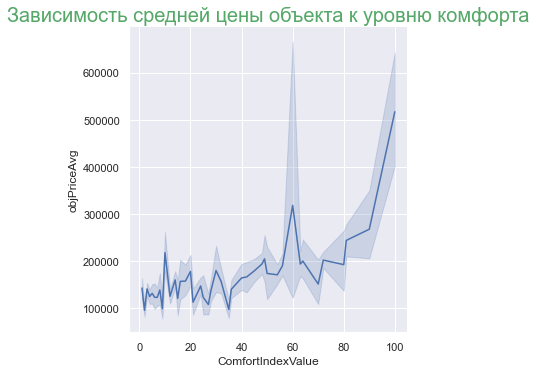

In [186]:
sns.relplot(
    x = 'ComfortIndexValue',
    y = 'objPriceAvg',
    data = buildings_particular,
    kind = 'line',
    height = 5
)
plt.title('Зависимость средней цены объекта к уровню комфорта', size=20, color='g');

### Можно заметить два явных всплеска средней цены по уровню комфорта, что предполагает большую значимость какого-то определенного индекса при формировании цены на объект

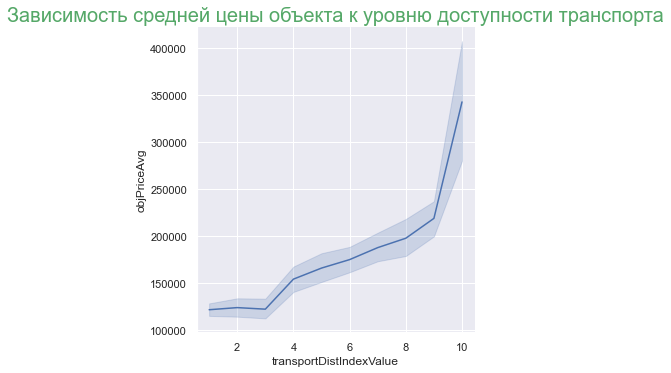

In [183]:
sns.relplot(
    x = 'transportDistIndexValue',
    y = 'objPriceAvg',
    data = buildings_particular,
    kind = 'line',
    height = 5
)
plt.title('Зависимость средней цены объекта к уровню доступности транспорта', size=20, color='g');

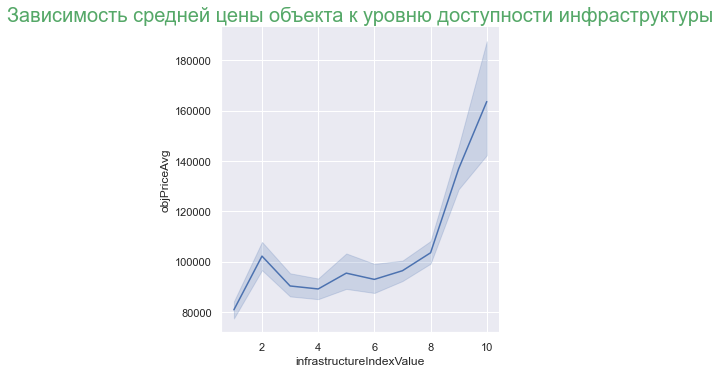

In [184]:
sns.relplot(
    x = 'infrastructureIndexValue',
    y = 'objPriceAvg',
    data = buildings_particular,
    kind = 'line',
    height = 5
)
plt.title('Зависимость средней цены объекта к уровню доступности инфраструктуры', size=20, color='g');

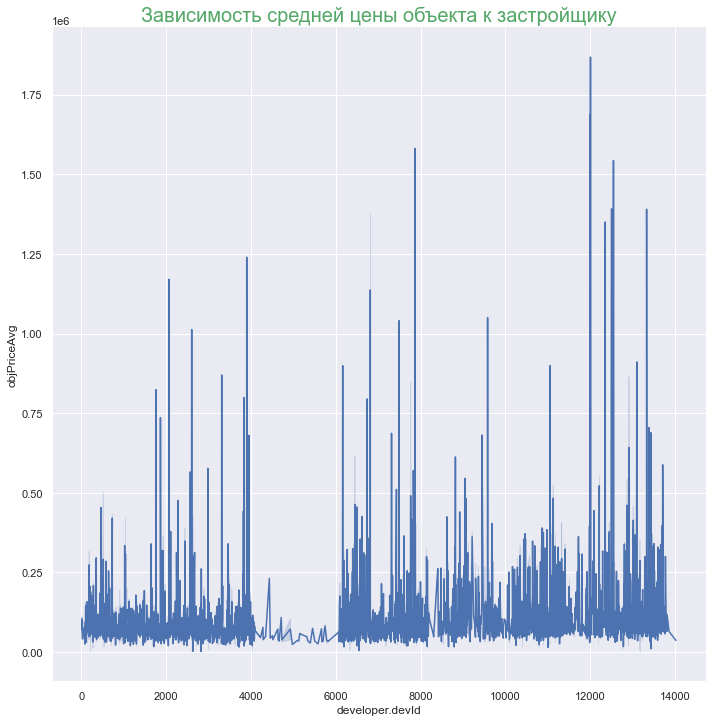

In [153]:
sns.relplot(
    x = 'developer.devId',
    y = 'objPriceAvg',
    data = buildings_particular,
    kind = 'line',
    height = 10
)
plt.title('Зависимость средней цены объекта к застройщику', size=20, color='g');

### 2. Средняя стоимость объекта недвижимости

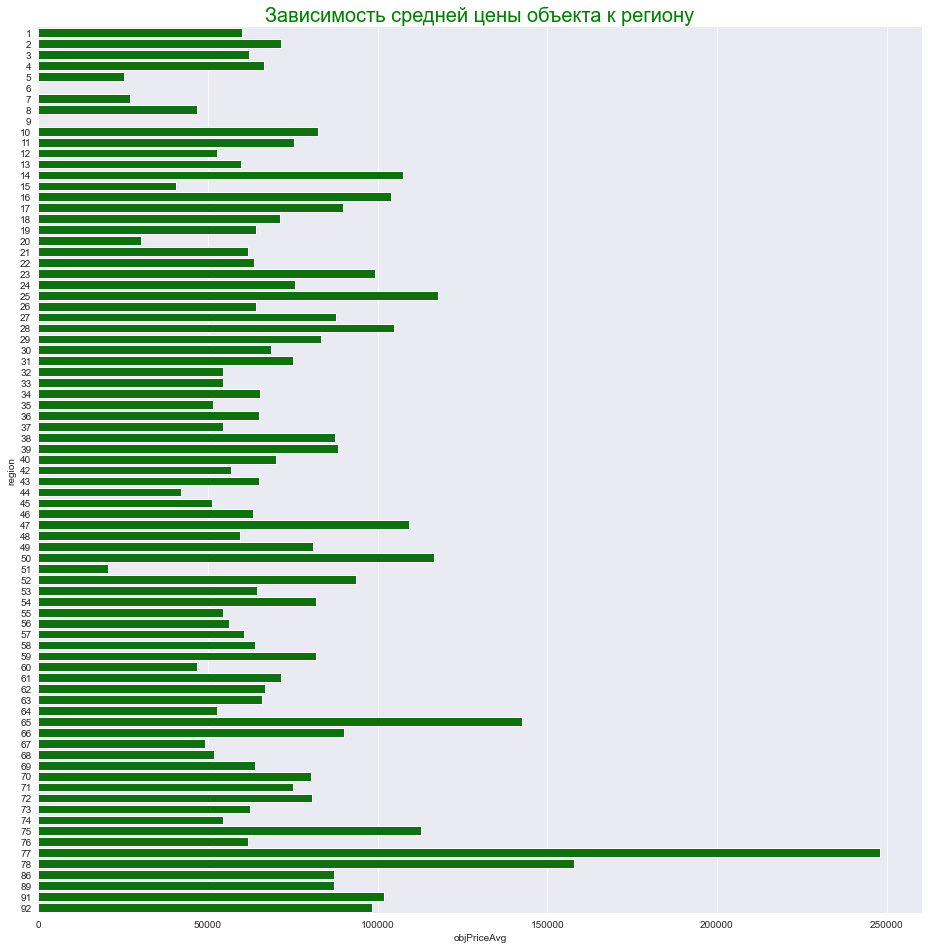

In [14]:
sns.catplot(
    data = buildings_particular.groupby('region').mean()[['objPriceAvg']].reset_index(),
    x = 'objPriceAvg',
    y = 'region',
    kind = 'bar',
    color='green',
    orient = 'h',
    height=13,
    # aspect=14
);
plt.title('Зависимость средней цены объекта к региону', size=20, color='g');

In [13]:
buildings_particular.groupby('region').mean()[['objPriceAvg']].reset_index().sort_values('objPriceAvg', ascending=False).set_index('region').join(regions.set_index('kladr_id'))

objPriceAvg             name_with_type
region                                          
77      247924.686763                   г Москва
78      157965.642857          г Санкт-Петербург
65      142431.800000            Сахалинская обл
25      117627.077922            Приморский край
50      116699.826307             Московская обл
...               ...                        ...
7        26918.282609  Респ Кабардино-Балкарская
5        25194.333333              Респ Дагестан
51       20442.000000             Мурманская обл
6                 NaN             Респ Ингушетия
9                 NaN  Респ Карачаево-Черкесская

[81 rows x 2 columns]

### Средняя стоимость объекта недвижимости в Москве самая дорогая и составляет на 63% больше, чем стоимость в ближайшем регионе преследователе Санкт-Петербурге

### 3. Зависимость среднего количества этажей к региону

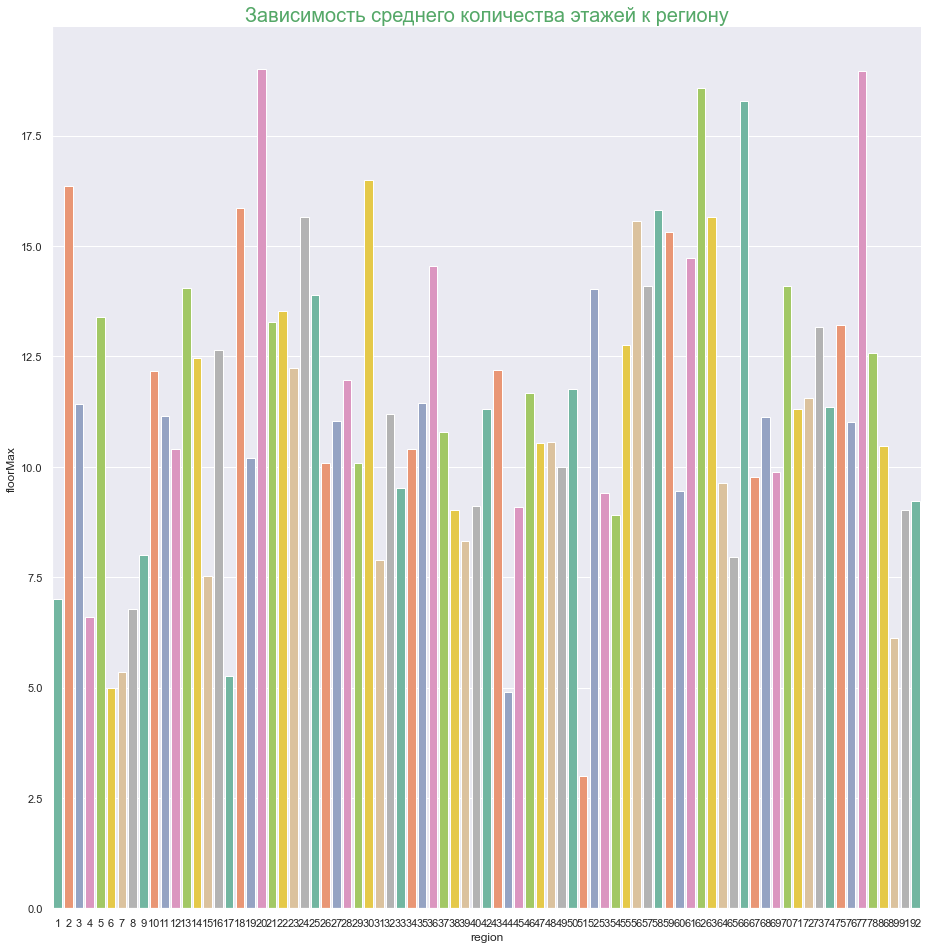

In [157]:
sns.catplot(
    data = buildings_particular.groupby('region').mean()[['floorMax']].reset_index(),
    x = 'region',
    y = 'floorMax',
    kind = 'bar',
    palette='Set2',
    height=13,
    # aspect=14
)
plt.title('Зависимость среднего количества этажей к региону', size=20, color='g');

In [14]:
buildings_particular.groupby('region').mean()[['floorMax']].reset_index().sort_values('floorMax', ascending=False).set_index('region').join(regions.set_index('kladr_id'))

floorMax             name_with_type
region                                      
20      19.000000             Респ Чеченская
77      18.953303                   г Москва
62      18.569444              Рязанская обл
66      18.283439           Свердловская обл
30      16.482759           Астраханская обл
...           ...                        ...
7        5.340426  Респ Кабардино-Балкарская
17       5.250000                  Респ Тыва
6        5.000000             Респ Ингушетия
44       4.890625            Костромская обл
51       3.000000             Мурманская обл

[81 rows x 2 columns]

### График и отсортированная табличка по среднему количеству этажей в регионах демонстрируют, что Москва не является лидером с большим преимуществом по этажности зданий, а уступает Чеченской республике (что подтверждает большой рост количества рожденных детей в республике и, соответственно, большой спрос на жилье). Рязанская и Свердловская области не сильно отстают от среднего показателя по этажности от Москвы.

### 4. Зависимость средней цены объекта к плановому году сдачи
Для получения года сдачи объекта необходимо распарсить objTransferPlanDt колонку до значения года

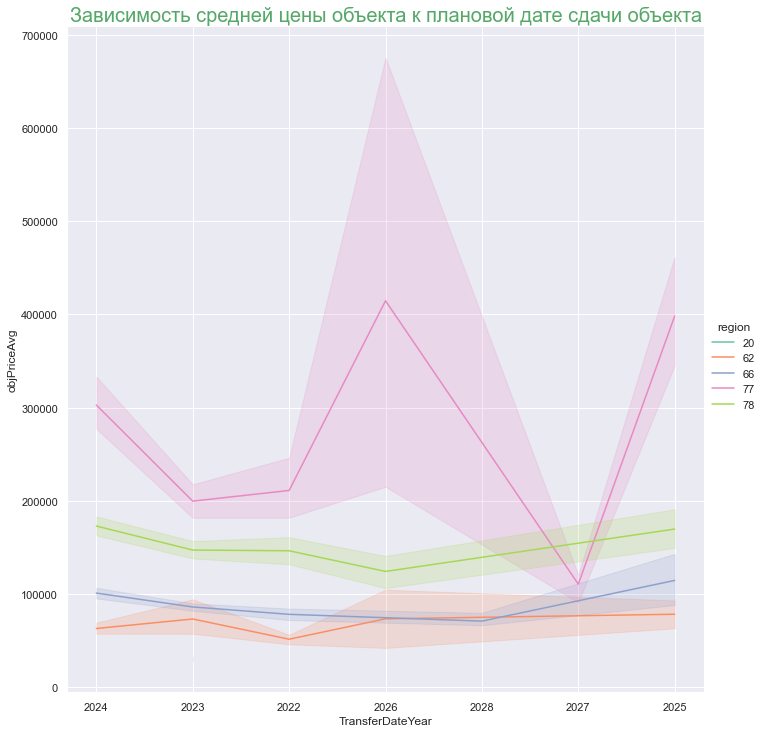

In [220]:
buildings_particular['TransferDateYear'] = buildings_particular['objTransferPlanDt'].dropna().apply(lambda x: '.'.join(x.split(' ')[0].split('-')[2:]))
sns.relplot(
    x = 'TransferDateYear',
    y = 'objPriceAvg',
    data = buildings_particular.query('region in [20, 77, 78, 62, 66]'),
    kind = 'line',
    height = 10,
    palette='Set2',
    hue= 'region',
    # hue_order=day_order
)
plt.title('Зависимость средней цены объекта к плановой дате сдачи объекта', size=20, color='g');

### Из графика можно заметить, что в отличие от многих регионов, срок сдачи жилья в Москве в 2026 году является наиболее ожидаемым и, соответственно, дорогостоящим

In [222]:
buildings_particular.groupby('region').mean()

pdId   floorMin   floorMax  objElemLivingCnt  \
region                                                          
1       171418.688889   6.844444   7.000000        111.533333   
2       305214.419753  13.156379  16.353909        240.008230   
3       434574.629630   9.907407  11.425926        116.740741   
4       434121.600000   6.600000   6.600000         71.200000   
5       103693.700000  12.100000  13.400000        177.300000   
...               ...        ...        ...               ...   
78      247140.225806  10.936950  12.565982        289.894428   
86      420610.126984   9.015873  10.460317        144.777778   
89      186441.303030   5.969697   6.121212         76.787879   
91      334236.106383   8.085106   9.026596         67.297872   
92      322199.580645   9.064516   9.225806         65.096774   

        objElemParkingCnt  objSquareLiving  objLkLatitude  objLkLongitude  \
region                                                                      
1               10.288889      4825.116889      44.982542       38.976233   
2               32.917695     11545.837325      54.667472       55.803665   
3               10.259259      6141.577222      51.798818      107.626987   
4                6.600000      3148.140000      51.967520       85.937360   
5                2.850000     12356.951000      42.962295       47.522350   
...                   ...              ...            ...             ...   
78              66.215543     12658.971202      59.929446       30.299683   
86              24.873016      8047.077143      61.260662       71.481825   
89               1.333333      3804.370000      65.865106       72.780315   
91              18.015957      3235.922128      44.901413       34.258437   
92              16.032258      3258.325806      44.585410       33.505894   

        objCompensFundFlg  objProblemFlg  ...  objElevatorPassengerCnt  \
region                                    ...                            
1                0.422222            0.0  ...                 0.400000   
2                0.288066            0.0  ...                 3.037190   
3                0.111111            0.0  ...                 1.592593   
4                0.000000            0.0  ...                 0.600000   
5                0.500000            0.0  ...                 2.833333   
...                   ...            ...  ...                      ...   
78               0.200880            0.0  ...                 3.827688   
86               0.047619            0.0  ...                 2.428571   
89               0.060606            0.0  ...                 1.090909   
91               0.250000            0.0  ...                 1.707447   
92               0.290323            0.0  ...                 1.566667   

        objElevatorCargoCnt  soldOutPerc    objPriceAvg  \
region                                                    
1                  0.600000     0.554793   59864.533333   
2                  1.231405     0.419706   71580.731579   
3                  0.777778     0.713878   61993.419355   
4                  0.400000     0.518187   66429.800000   
5                  1.444444     0.646649   25194.333333   
...                     ...          ...            ...   
78                 3.625920     0.511538  157965.642857   
86                 1.365079     0.485172   87217.500000   
89                 0.121212     0.702218   87026.161290   
91                 0.484043     0.617147  101799.537415   
92                 0.766667     0.608755   98440.090909   

        developer.companyGroupId  greenAreaIndexValue  airQualityIndexValue  \
region                                                                        
1                    8432.820513                  NaN                   NaN   
2                    6497.359788                  NaN                   NaN   
3                    7250.604651                  NaN                   NaN   
4                    7798.500000           

### 5. Зависимость средней цены объекта к доступным парковочным местам
Для получения информации о доступных парковочных местах найдем сумму objInfrstrObjPrkngCnt и objInfrstrNotObjPrkngCnt

In [224]:
buildings_particular['commonPrkngCnt'] = buildings_particular['objInfrstrObjPrkngCnt'] + buildings_particular['objInfrstrNotObjPrkngCnt']

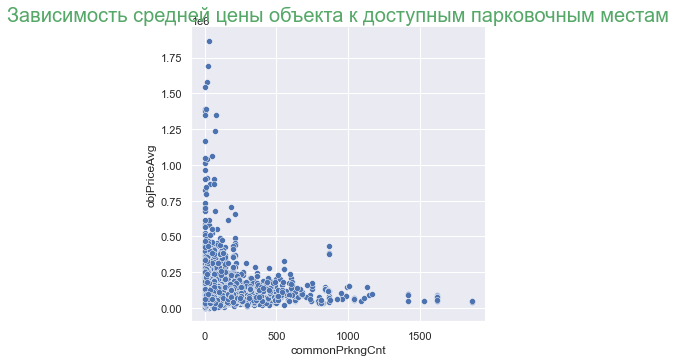

In [229]:
sns.relplot(
    x = 'commonPrkngCnt',
    y = 'objPriceAvg',
    data = buildings_particular,
    kind = 'scatter',
    height = 5
)
plt.title('Зависимость средней цены объекта к доступным парковочным местам', size=20, color='g');

### По графику можно увидеть, что дорогие квартиры обычно идут без расчета на наличие автомобиля, а то и нескольких (беда больших городов)

### 6. Зависимость цены на объект недвижимости от времени пешей доступности до метро

In [16]:
def round_time(x):
    rest = round(x) % 10
    whole = round(x) // 10
    if rest <= 3:
        rest = 0
    elif rest <= 6:
        rest = 5
    else:
        whole += 1
        rest = 0
    return whole * 10 + rest

In [17]:
transp_time_price = buildings_particular['metro.time'].dropna().map(lambda x : round_time(x)).reset_index().join(buildings_particular[['region', 'objPriceAvg']], on='id').set_index('region').join(regions.set_index('kladr_id'))
transp_time_price

id  metro.time  objPriceAvg     name_with_type
16  25056          20     106738.0     Респ Татарстан
16  25065          25      95784.0     Респ Татарстан
16  25066          15      89137.0     Респ Татарстан
16  30292          25     106582.0     Респ Татарстан
16  31635          20      75529.0     Респ Татарстан
..    ...         ...          ...                ...
78  23382          30      87640.0  г Санкт-Петербург
78  12633           0     213321.0  г Санкт-Петербург
78  12635          10     217876.0  г Санкт-Петербург
78  12642          10     235808.0  г Санкт-Петербург
78  12643          10     178927.0  г Санкт-Петербург

[1808 rows x 4 columns]

In [51]:
buildings_particular['metro.time'].dropna().map(lambda x : round_time(x))

id
20524    10
38990    10
43099    20
10351    10
24730    10
         ..
28073    20
28074    20
37312    20
37313    10
37314    10
Name: metro.time, Length: 1808, dtype: int64

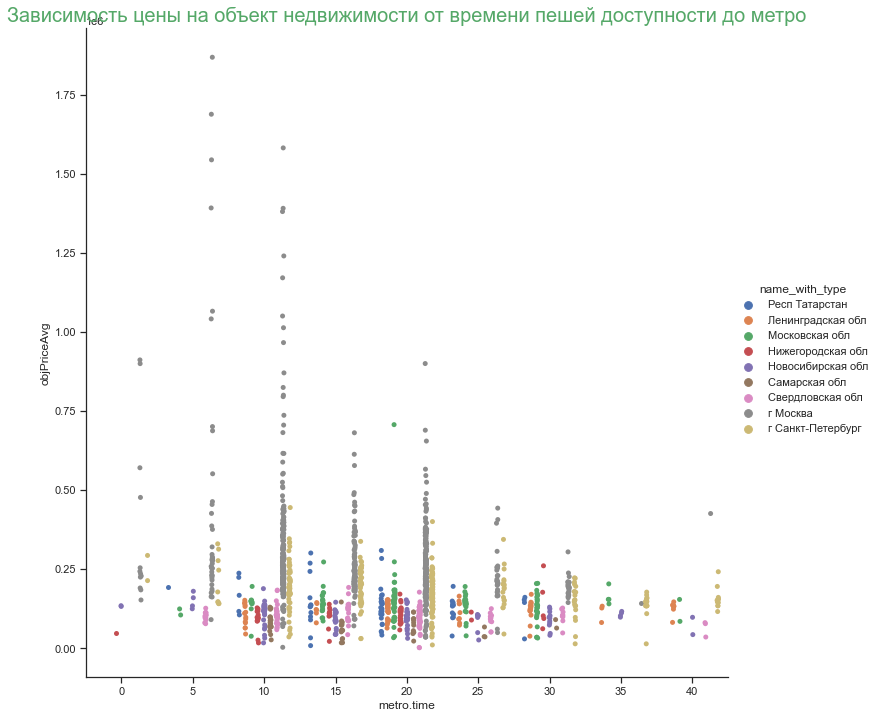

In [58]:
sns.set(style="ticks", color_codes=True)

sns.catplot(
    x='metro.time',
    y='objPriceAvg',
    data=transp_time_price,
    hue='name_with_type',    # оба на одном графике разными цветами
    jitter=0.1,
    height=10,
    kind='strip',
    dodge=True)
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('Зависимость цены на объект недвижимости от времени пешей доступности до метро', size=20, color='g');

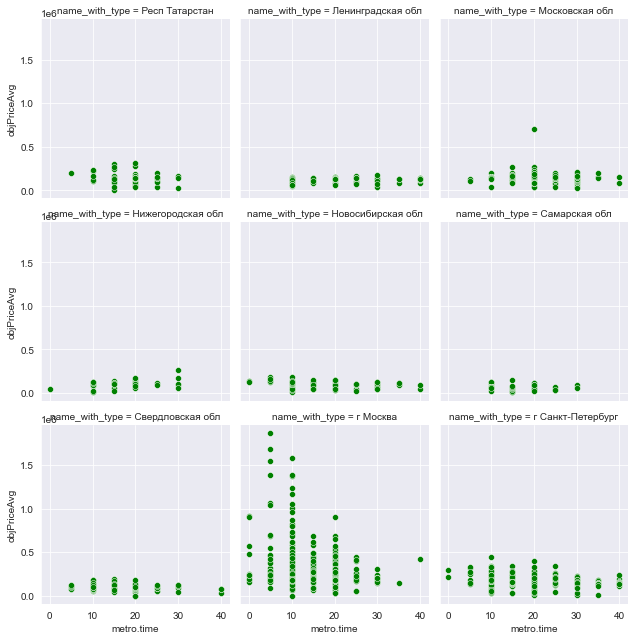

In [21]:
sns.relplot(
    x='metro.time',
    y='objPriceAvg',
    color='green',
    col='name_with_type',
    col_wrap=3,
    data=transp_time_price,
    height=3
);

### Из графика можно заметить, что наибольшая стоимость квартир сильно зависит от доступности метро поблизости (такую тенденцию можно заметить для всех регионов, где есть метро)

### 7. Зависимость стоимости квартиры в Москве по доступности до конкретных веток метрополитена

In [23]:
def round_time_hard(x):
    if round(x) <= 15:
        return '15-'
    elif round(x) > 15:
        return '15+'

In [37]:
# transp_time_price =
#
#     buildings_particular['metro.time'].dropna().map(lambda x : round_time(x)).reset_index().join(buildings_particular[['region', 'objPriceAvg']], on='id').set_index('region').join(regions.set_index('kladr_id'))
# transp_time_price
line_time = buildings_particular[buildings_particular['region'] == 77]['metro.time'].dropna().map(lambda x : round_time_hard(x)).reset_index().join(buildings_particular[['metro.line', 'objPriceAvg', 'metro.name']], on='id').dropna()
name_line = {'Замоскворецкая' : 'G', 'МЦК' : 'MCR', 'Таганско-Краснопресненская': 'P', 'Арбатско-Покровская': 'B', 'МЦД - 1': 'MCD1', 'Некрасовская': 'V', 'Сокольническая': 'R', 'Бутовская': 'BG', 'Калужско-Рижская': 'O', 'Калининская': 'Y', 'Солнцевская': 'YA', 'Большая кольцевая линия': 'Br', 'Серпуховско-Тимирязевская': 'Grey', 'Люблинско-Дмитровская': 'L', 'Филевская': 'LB', 'МЦД - 2': 'MCD2', 'Кольцевая': 'Br', 'Монорельс': 'M', 'Каховская': 'T'}
line_time['short_name'] = line_time['metro.line'].map(name_line)
line_time

id metro.time                  metro.line  objPriceAvg  \
0    20524        15-              Замоскворецкая     207678.0   
1    24730        15-                         МЦК     256268.0   
2    24731        15-                         МЦК     224305.0   
3    24732        15-                         МЦК     252214.0   
5    22776        15-  Таганско-Краснопресненская     120166.0   
..     ...        ...                         ...          ...   
676  30547        15-              Замоскворецкая     171200.0   
677  30548        15-              Замоскворецкая     181000.0   
678  30549        15-              Замоскворецкая     181000.0   
680  10080        15+     Большая кольцевая линия     565605.0   
681   7910        15-       Люблинско-Дмитровская     476323.0   

             metro.name short_name  
0        Водный стадион          G  
1                 Зорге        MCR  
2                 Зорге        MCR  
3                 Зорге        MCR  
5          Полежаевская          P  
..                  ...        ...  
676       Речной вокзал          G  
677       Речной вокзал          G  
678       Речной вокзал          G  
680  Народное Ополчение         Br  
681          Чкаловская          L  

[589 rows x 6 columns]

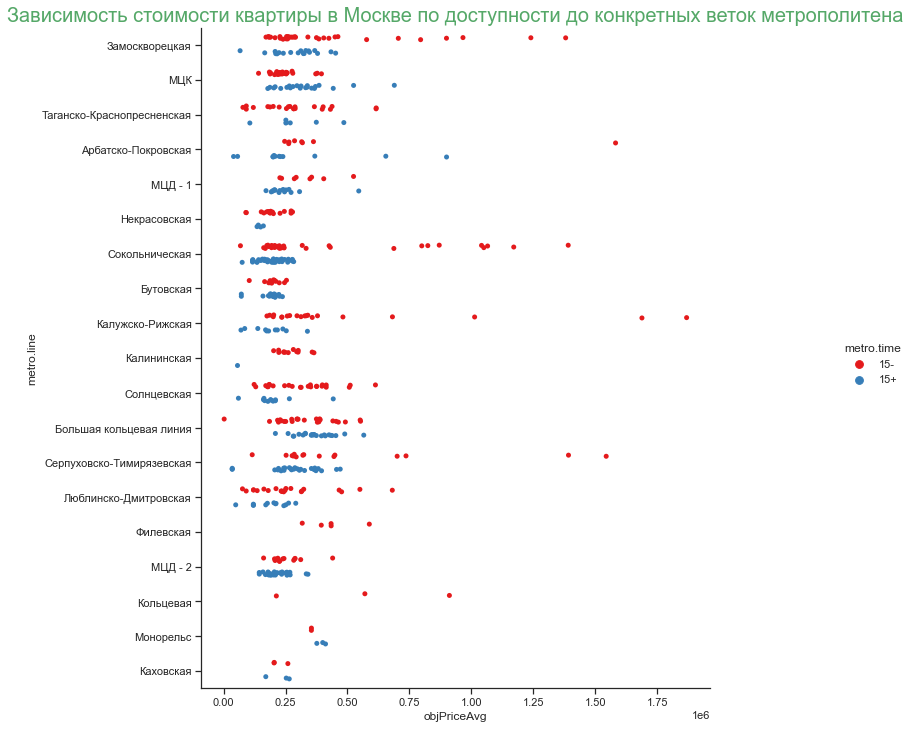

In [28]:
sns.set(style="ticks", color_codes=True)

sns.catplot(
    y='metro.line',
    x='objPriceAvg',
    data=line_time,
    hue='metro.time',    # оба на одном графике разными цветами
    jitter=0.1,
    height=10,
    kind='strip',
    dodge=True,
    palette='Set1',
    orient='h'
)
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('Зависимость стоимости квартиры в Москве по доступности до конкретных веток метрополитена', size=20, color='g');

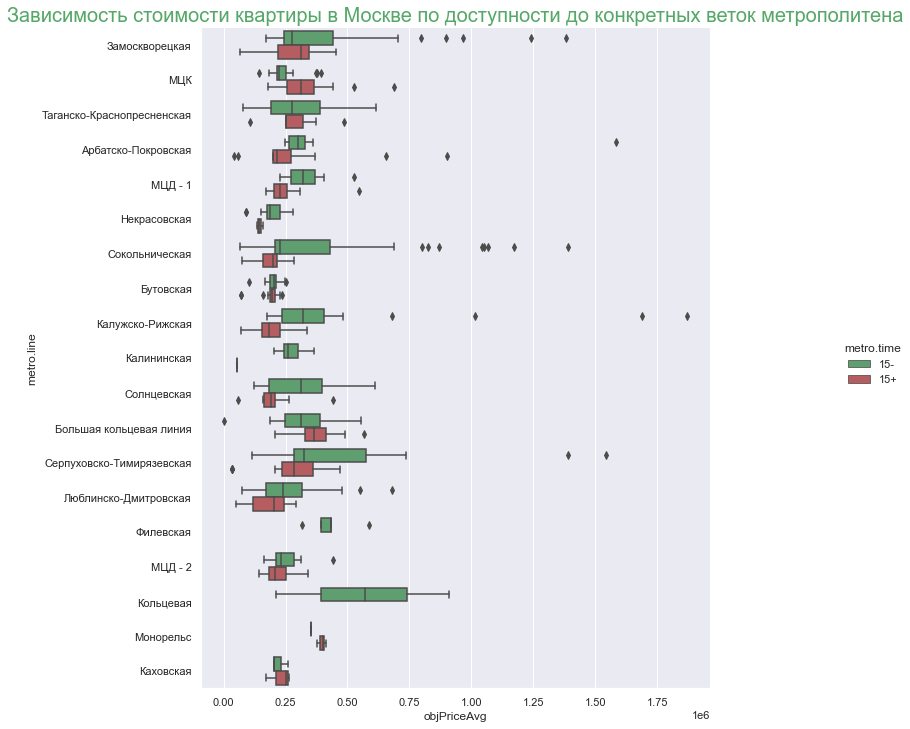

In [29]:
sns.set(style='darkgrid')
sns.catplot(
    y='metro.line',
    x='objPriceAvg',
    data=line_time,
    kind='box',
    height=10,
    hue='metro.time',
    hue_order=['15-','15+'],
    palette={"15-": "g", "15+": "r"},
    orient='h'
);
plt.title('Зависимость стоимости квартиры в Москве по доступности до конкретных веток метрополитена', size=20, color='g');

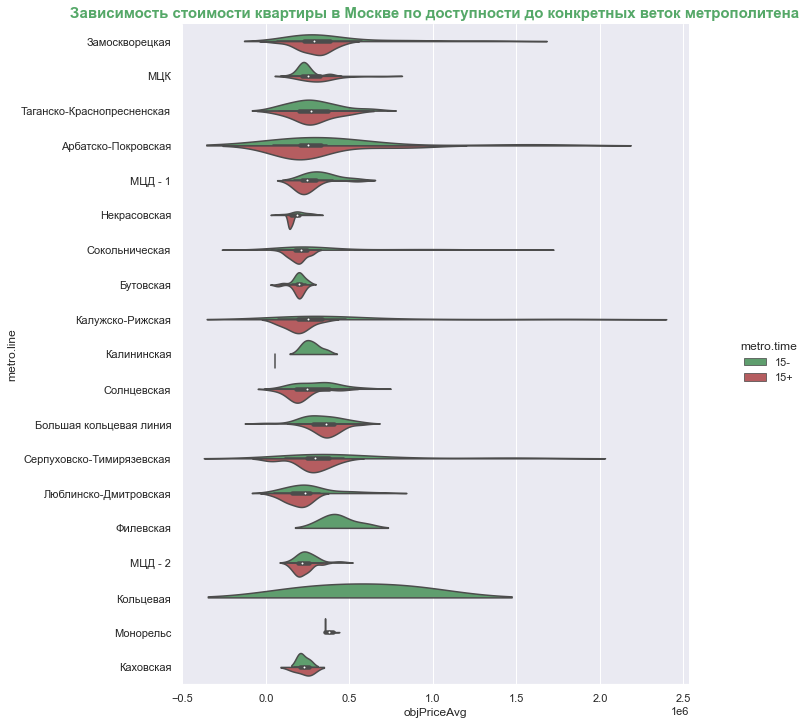

In [30]:
sns.catplot(
    y='metro.line',
    x='objPriceAvg',
    data=line_time,
    kind='violin',
    hue='metro.time',
    hue_order=['15-','15+'],
    palette={"15-": "g", "15+": "r"},
    split=True,
    height=10,
    orient='h'
)

plt.title('Зависимость стоимости квартиры в Москве по доступности до конкретных веток метрополитена', size=15, color='g', weight='bold');

### Из графиков снова можно заключить, что стоимость объекта недвижимости зависит от затраченных минут на хождение до ближайшего метрополитена. Но по графикам сложно выделить конкретные ветки, которые представляют "больший" спрос у населения, скорее всего необходимо просмотреть конкретные станции

### 8. Зависимость роста стоимости объектов недвижимости в зависимости от конкретных станций метрополитена в Москве

In [38]:
# line_time['short_station'] =  line_time['metro.name'].apply(lambda x: x[:5])
line_time

id metro.time                  metro.line  objPriceAvg  \
0    20524        15-              Замоскворецкая     207678.0   
1    24730        15-                         МЦК     256268.0   
2    24731        15-                         МЦК     224305.0   
3    24732        15-                         МЦК     252214.0   
5    22776        15-  Таганско-Краснопресненская     120166.0   
..     ...        ...                         ...          ...   
676  30547        15-              Замоскворецкая     171200.0   
677  30548        15-              Замоскворецкая     181000.0   
678  30549        15-              Замоскворецкая     181000.0   
680  10080        15+     Большая кольцевая линия     565605.0   
681   7910        15-       Люблинско-Дмитровская     476323.0   

             metro.name short_name  
0        Водный стадион          G  
1                 Зорге        MCR  
2                 Зорге        MCR  
3                 Зорге        MCR  
5          Полежаевская          P  
..                  ...        ...  
676       Речной вокзал          G  
677       Речной вокзал          G  
678       Речной вокзал          G  
680  Народное Ополчение         Br  
681          Чкаловская          L  

[589 rows x 6 columns]

In [39]:
def plot_depen_by_line(line_time, short_index):
    sns.catplot(
        y='metro.name',
        # x='metro.name',
        x='objPriceAvg',
        data=line_time[line_time['short_name'] == short_index],
        kind='violin',
        hue='metro.time',
        hue_order=['15-','15+'],
        palette={"15-": "g", "15+": "r"},
        split=True,
        height=9,
        orient='h'
    )

    plt.title(f'Зависимость стоимости квартиры в Москве по доступности до станций метрополитена на {short_index} ветке', size=15, color='g', weight='bold');

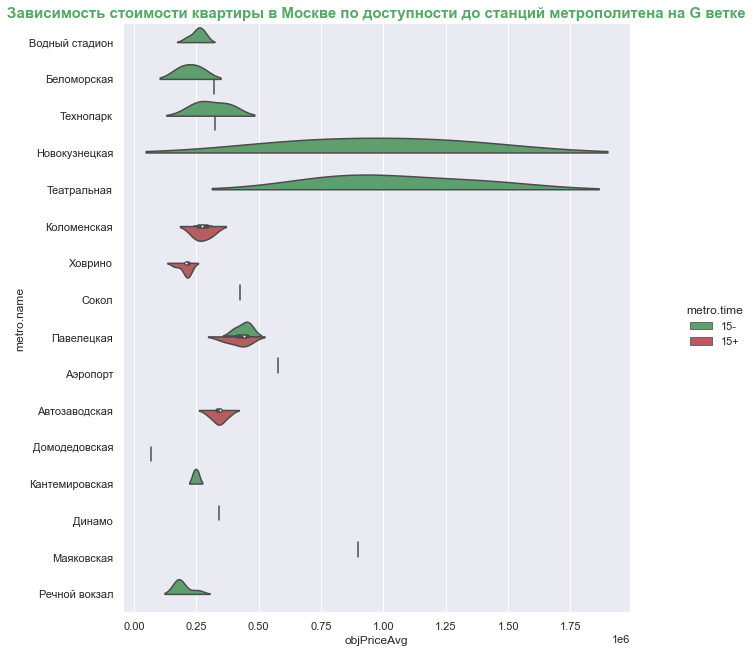

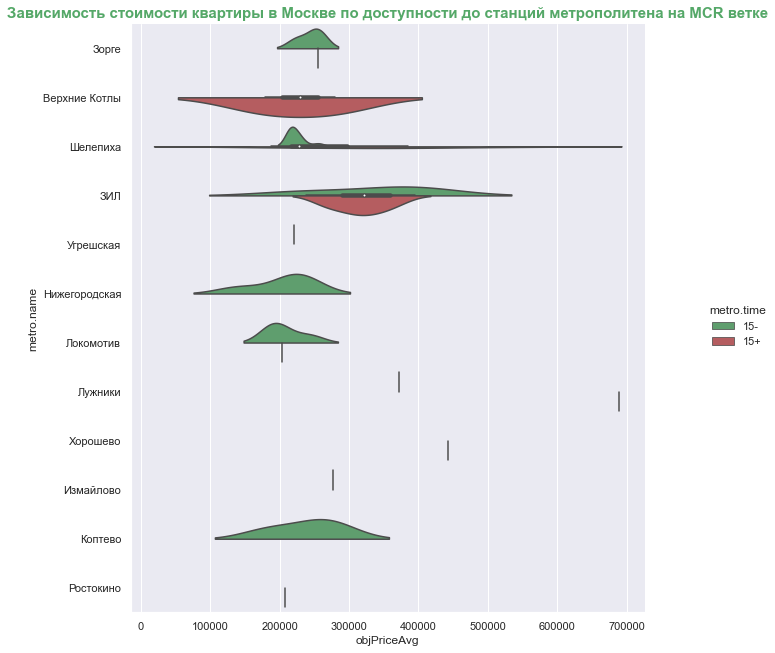

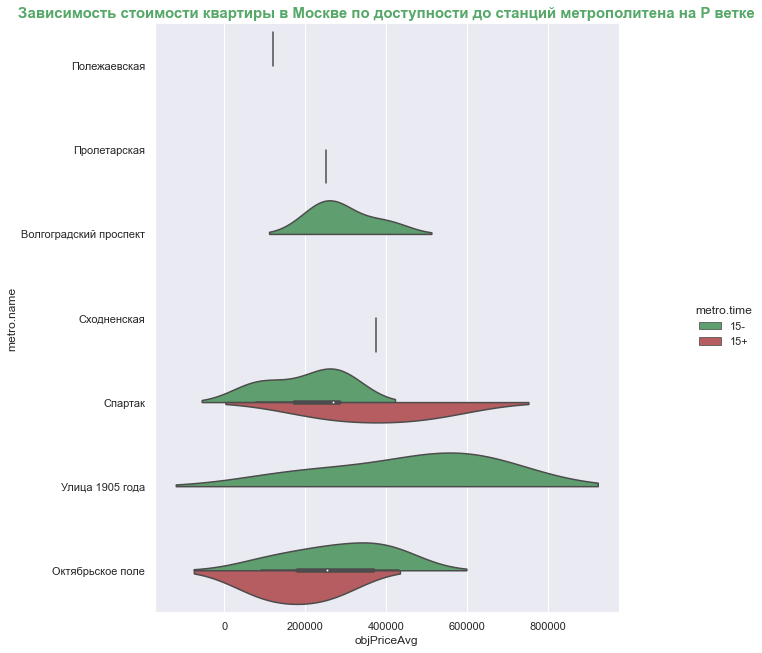

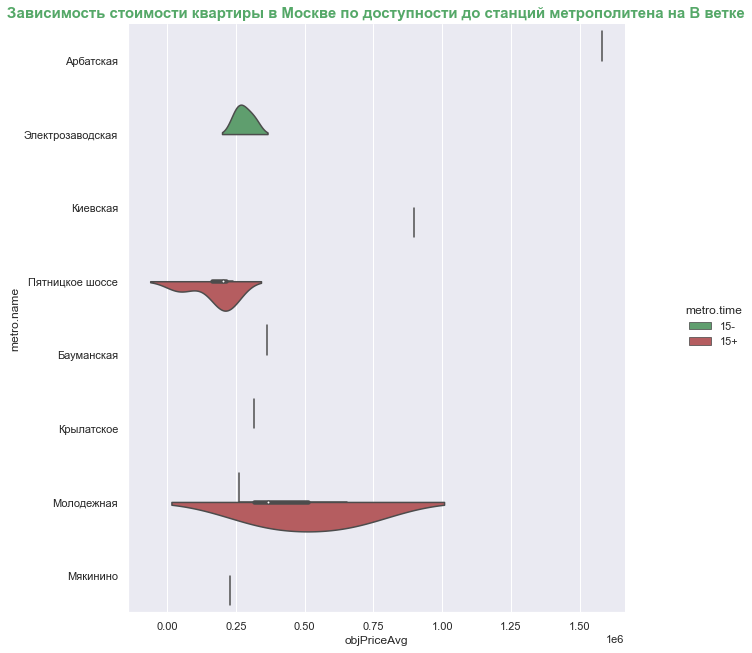

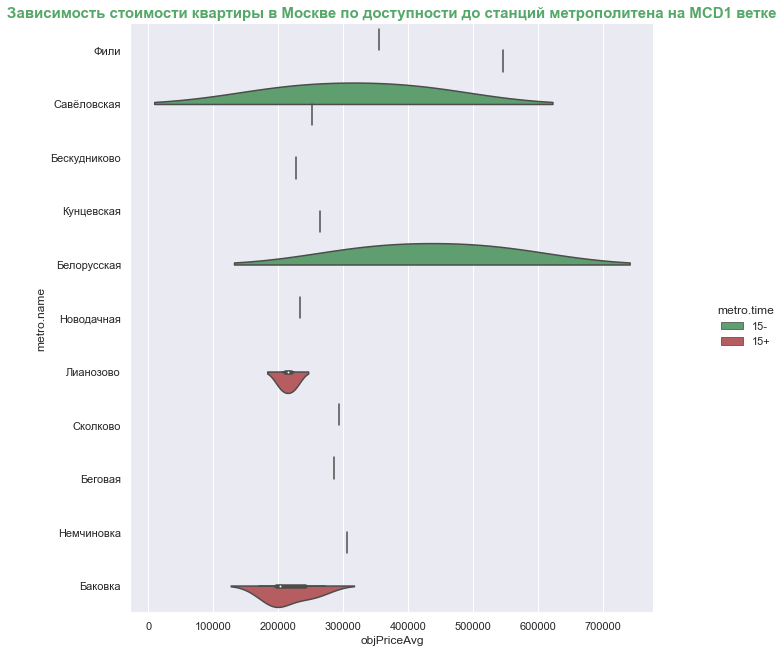

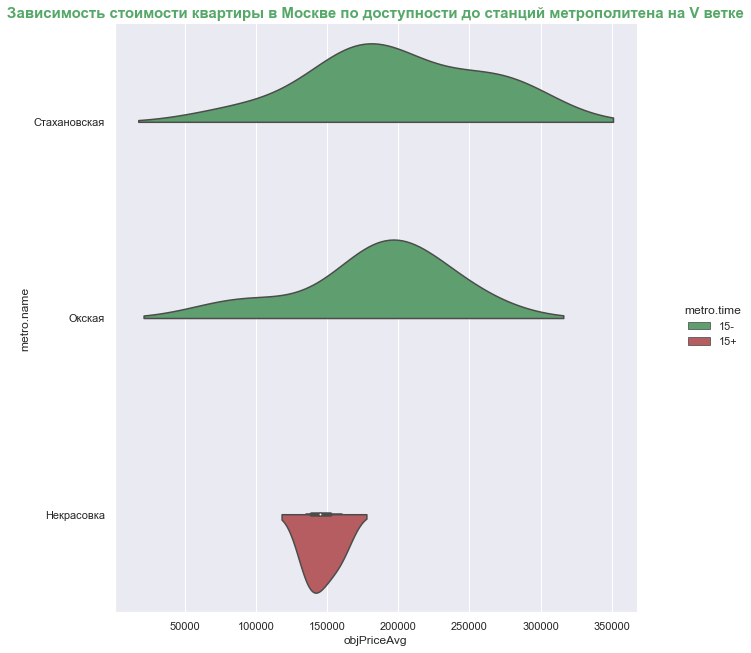

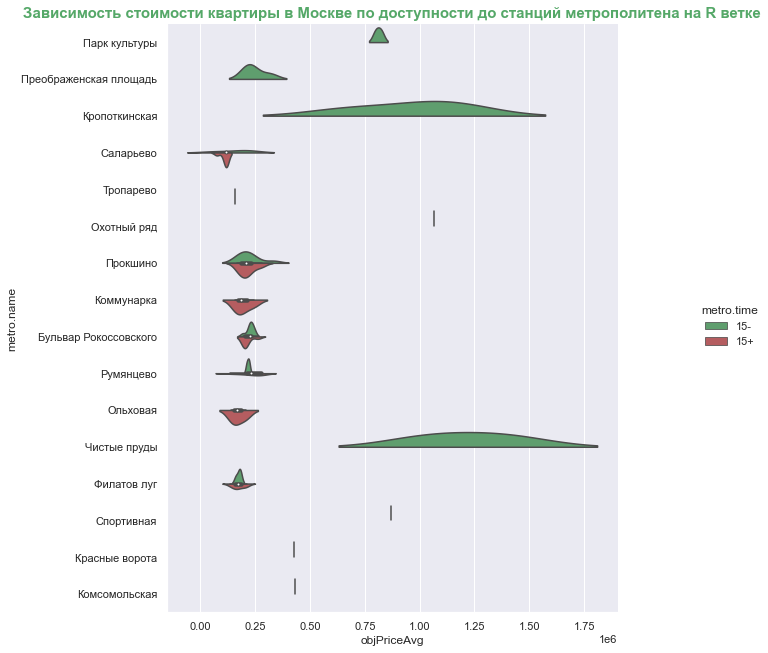

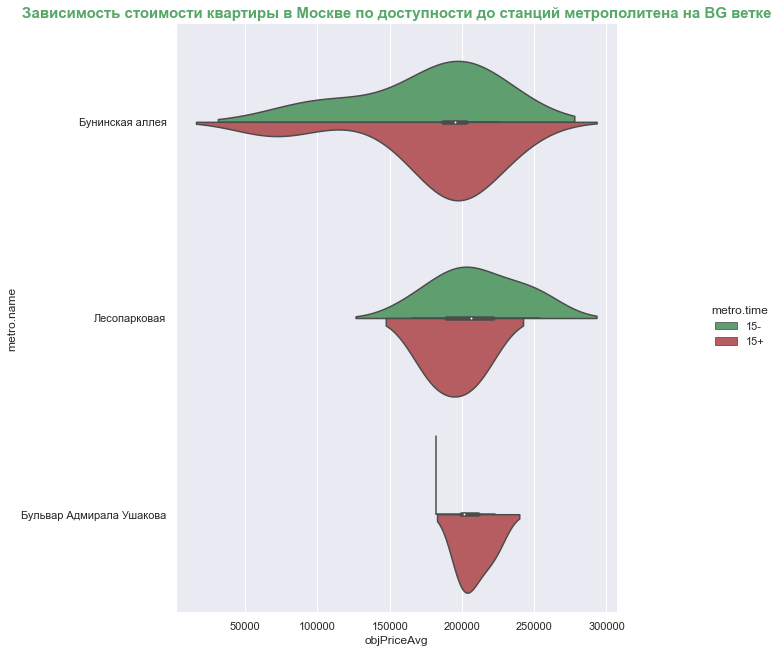

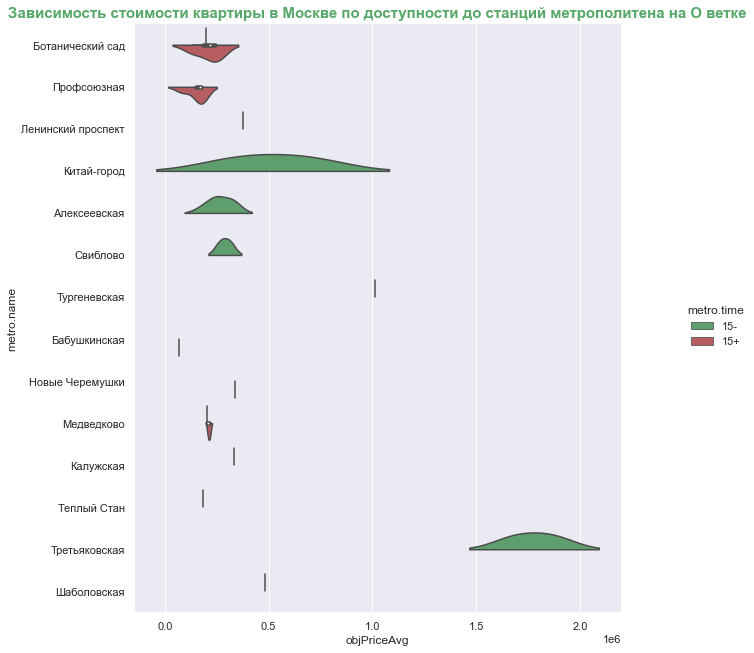

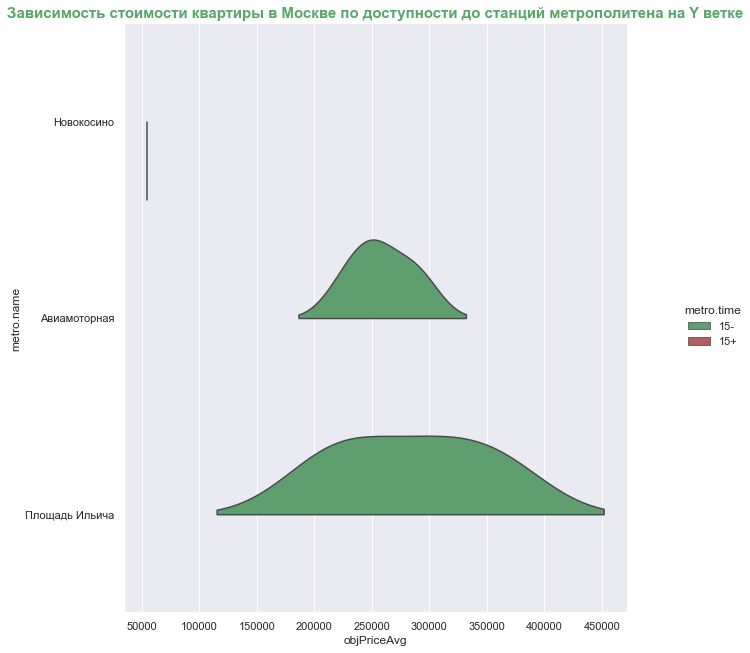

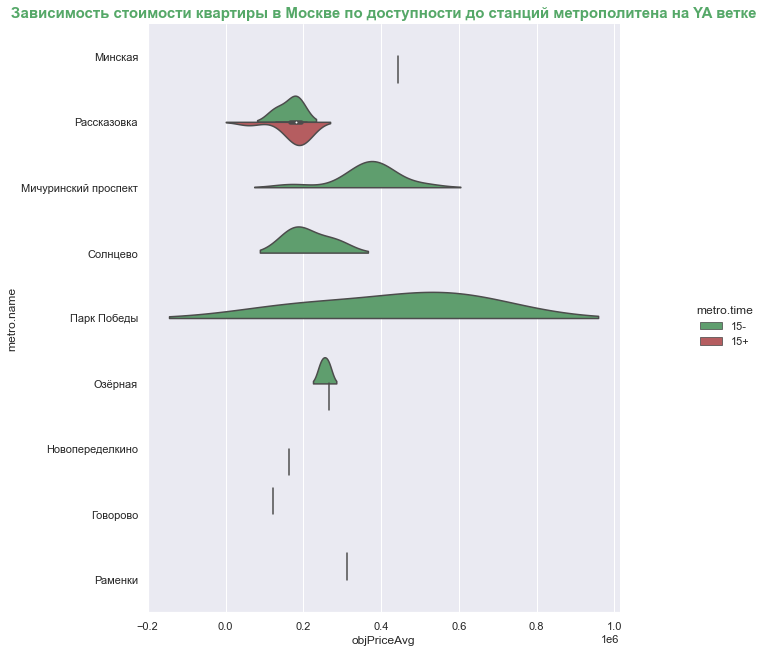

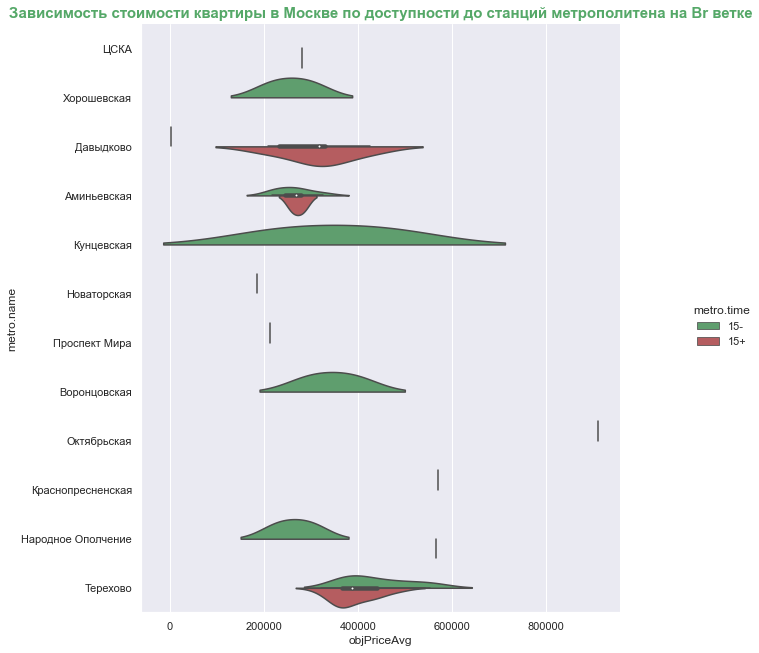

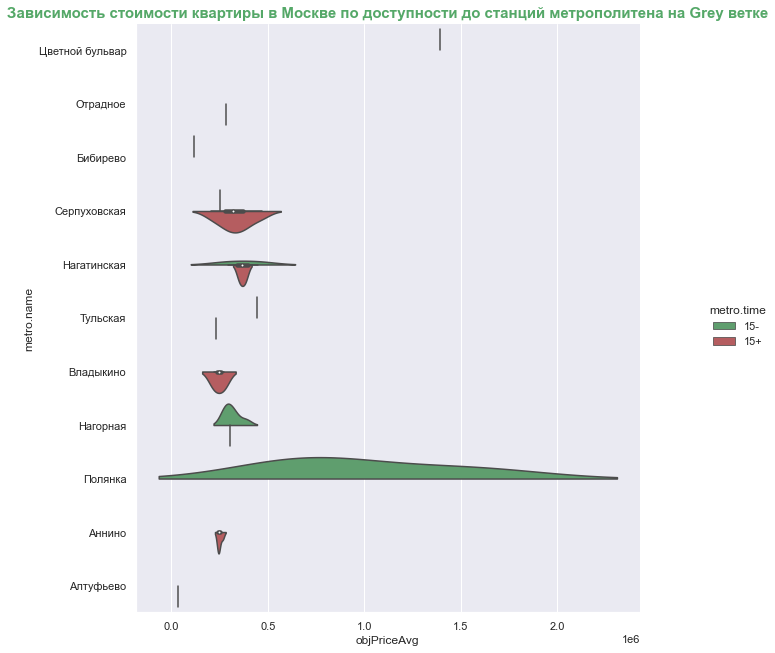

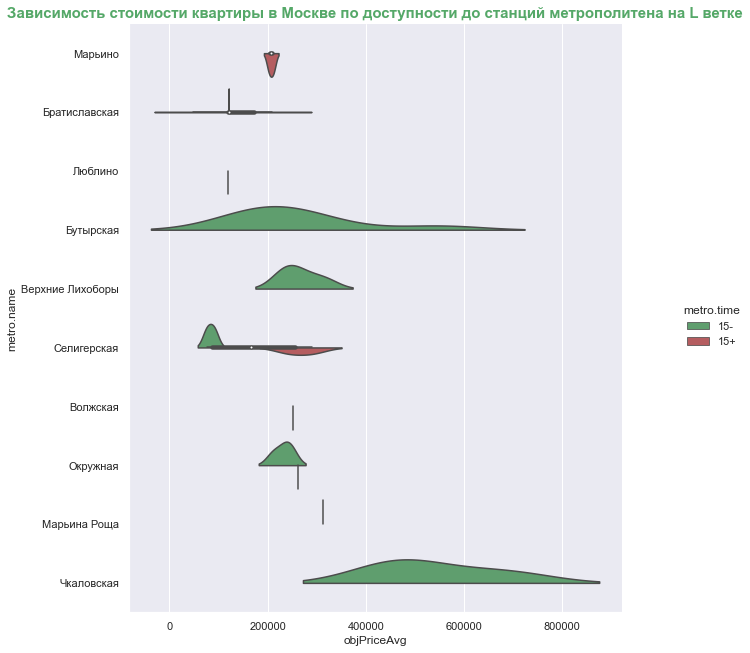

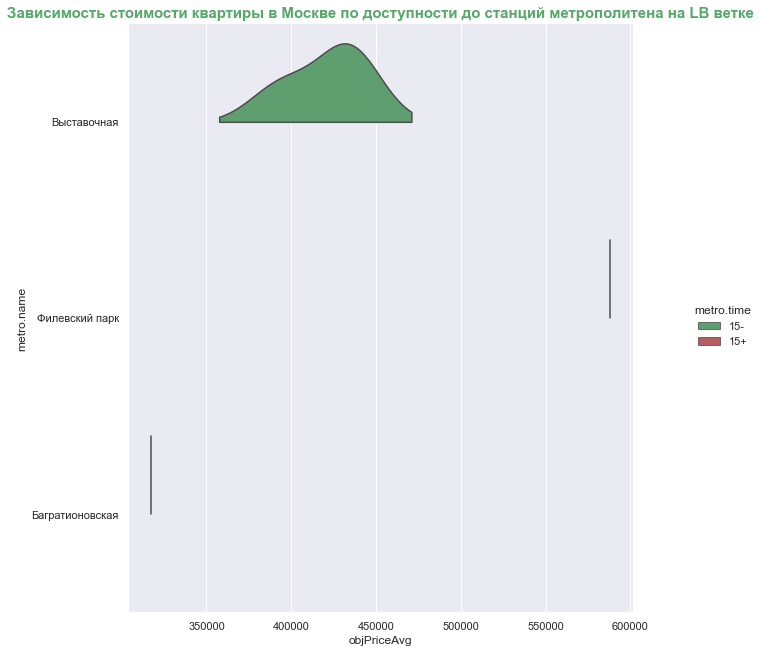

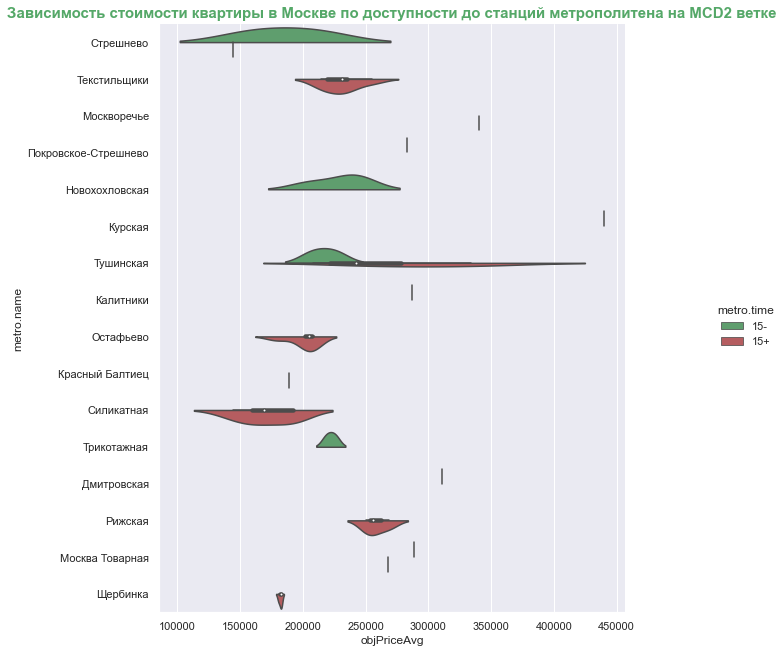

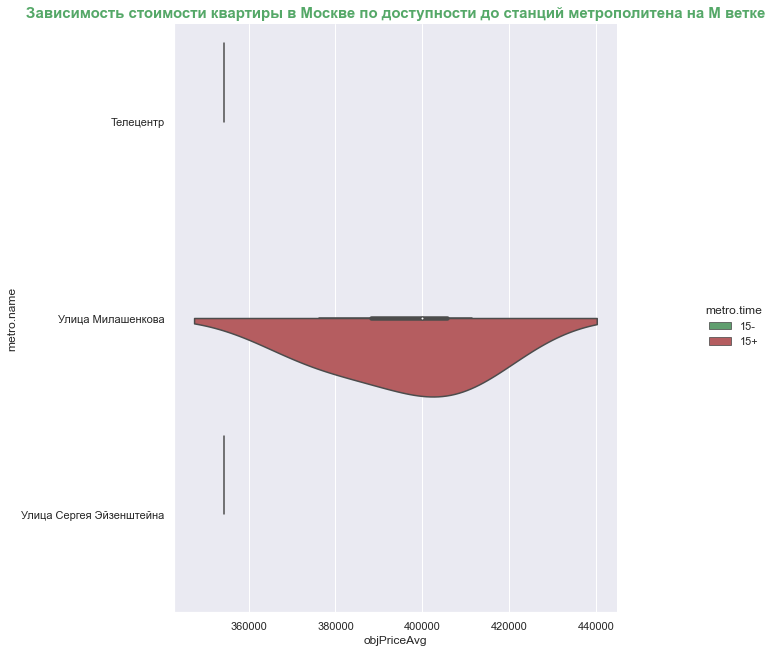

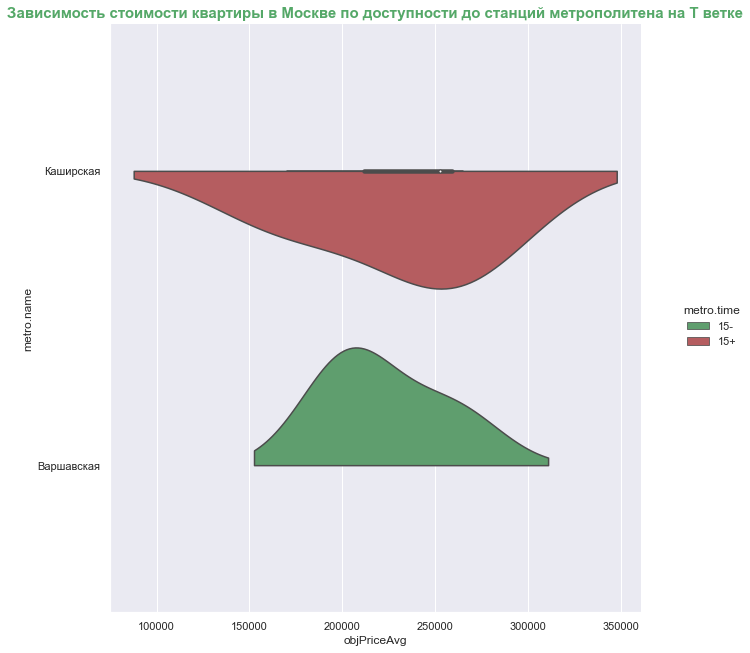

In [40]:
for name in line_time['short_name'].unique():
    plot_depen_by_line(line_time, name)

### По графикам изменения цены в зависимости от станций метрополитена в Москве есть два вывода: 1. Цена напрямую зависит от дальности станции метро от центра города; 2. На некоторых ветках заметен рост стоимости квартир даже вне садового кольца, что связано с возможностью пересадки на этой станции на другие направления (и, в целом, транспортную доступность). Но вообще данных недостаточно, чтобы делать более детальные выводы